In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


In [2]:
circuitData=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv')
qualiData=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv')
constructorData=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv')
driverData=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv')
raceData=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/races.csv')
circuitData.head()


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [3]:
qualiData.head()


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [4]:
constructorData.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [5]:
driverData.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [6]:
raceData.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [7]:
qualiData.shape

(9575, 9)

# **No of poles with respect to Constructor**

In [8]:
qualiData[['position','constructorId']].isnull().sum(axis=1).sort_values(ascending=False)

0       0
6378    0
6380    0
6381    0
6382    0
       ..
3192    0
3193    0
3194    0
3195    0
9574    0
Length: 9575, dtype: int64

In [9]:
qualiData[['position']].isin([1]).sum(axis=0)

position    448
dtype: int64

In [10]:
qualiConsData=pd.merge(qualiData,constructorData,on='constructorId')

In [11]:
qualiConsData.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,constructorRef,name,nationality,url
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,25,19,5,1,23,3,1:35.227,1:34.759,1:36.613,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,26,19,1,1,22,4,1:35.392,1:34.627,1:36.709,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,47,20,1,1,22,3,1:32.750,1:31.922,1:33.292,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [12]:
qualiConsData.shape

(9575, 13)

In [13]:
qualiConsData[['position','constructorId','name']].isnull().sum(axis=1).sort_values(ascending=False)

0       0
6378    0
6380    0
6381    0
6382    0
       ..
3192    0
3193    0
3194    0
3195    0
9574    0
Length: 9575, dtype: int64

In [14]:
qualiConsData[['position']].isin([1]).sum(axis=0)

position    448
dtype: int64

<Axes: xlabel='position'>

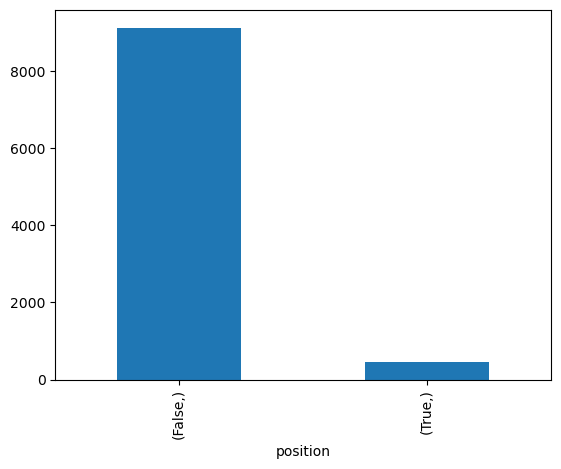

In [15]:
qualiConsData[['position']].isin([1]).value_counts().plot(kind="bar")

In [16]:
qualiConsData.groupby(['name'])["position"].count()   #filter(lambda x: (x['V'] == 0).any())

name
Alfa Romeo        163
AlphaTauri        122
Alpine F1 Team     88
Arrows             52
Aston Martin       88
BAR               121
BMW Sauber        140
Benetton          128
Brawn              34
Caterham          112
Ferrari           896
Footwork           78
Force India       423
Forti              42
HRT               115
Haas F1 Team      287
Honda             106
Jaguar             82
Jordan            238
Larrousse          30
Ligier             78
Lotus              76
Lotus F1          154
MF1                28
Manor Marussia     66
Marussia          118
McLaren           893
Mercedes          517
Minardi           238
Pacific            40
Prost              50
Racing Point       76
Red Bull          694
Renault           522
Sauber            588
Simtek             37
Spyker             34
Spyker MF1          8
Stewart            40
Super Aguri        78
Team Lotus         30
Toro Rosso        533
Toyota            250
Tyrrell           111
Virgin             76
Willi

In [17]:
qualiConsDataDf = qualiConsData.groupby(['name']).apply(lambda x: x[x['position'] == 1 ]['position'].sum()).sort_values(ascending=False)

In [18]:
qualiConsDataDf

name
Mercedes          131
Ferrari            95
Red Bull           80
McLaren            56
Williams           38
Renault            20
Benetton           11
Brawn               5
Toyota              3
BAR                 2
Haas F1 Team        1
Racing Point        1
Jordan              1
BMW Sauber          1
Honda               1
Force India         1
Toro Rosso          1
Pacific             0
Super Aguri         0
Spyker MF1          0
Spyker              0
Simtek              0
Sauber              0
Team Lotus          0
Tyrrell             0
Prost               0
Virgin              0
Stewart             0
Alfa Romeo          0
Minardi             0
HRT                 0
Alpine F1 Team      0
Arrows              0
Aston Martin        0
Caterham            0
Footwork            0
Forti               0
Jaguar              0
Marussia            0
Larrousse           0
Ligier              0
Lotus               0
Lotus F1            0
AlphaTauri          0
Manor Marussia      0
MF1  

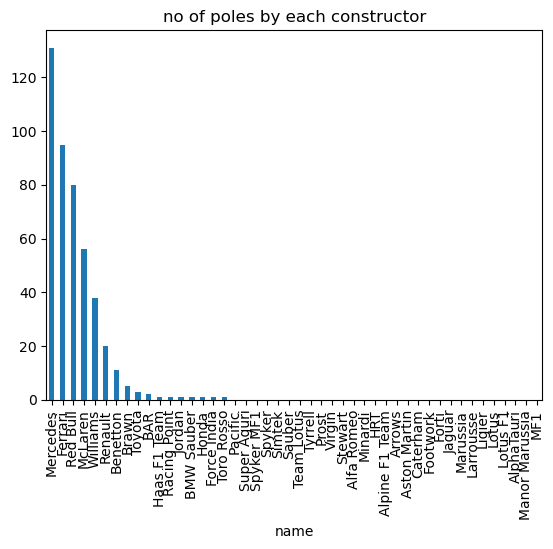

In [19]:
qualiConsDataDf.plot(kind='bar',
        x='name',
        y='poles')
        #color='green')
plt.title('no of poles by each constructor')
 

plt.show()

# **No of Poles with repect to Drivers**

In [20]:
qualiDriverData=pd.merge(qualiData,driverData,on='driverId')

In [21]:
qualiDriverData[['position','driverId','code']].isnull().sum(axis=1).sort_values(ascending=False)

0       0
6378    0
6380    0
6381    0
6382    0
       ..
3192    0
3193    0
3194    0
3195    0
9574    0
Length: 9575, dtype: int64

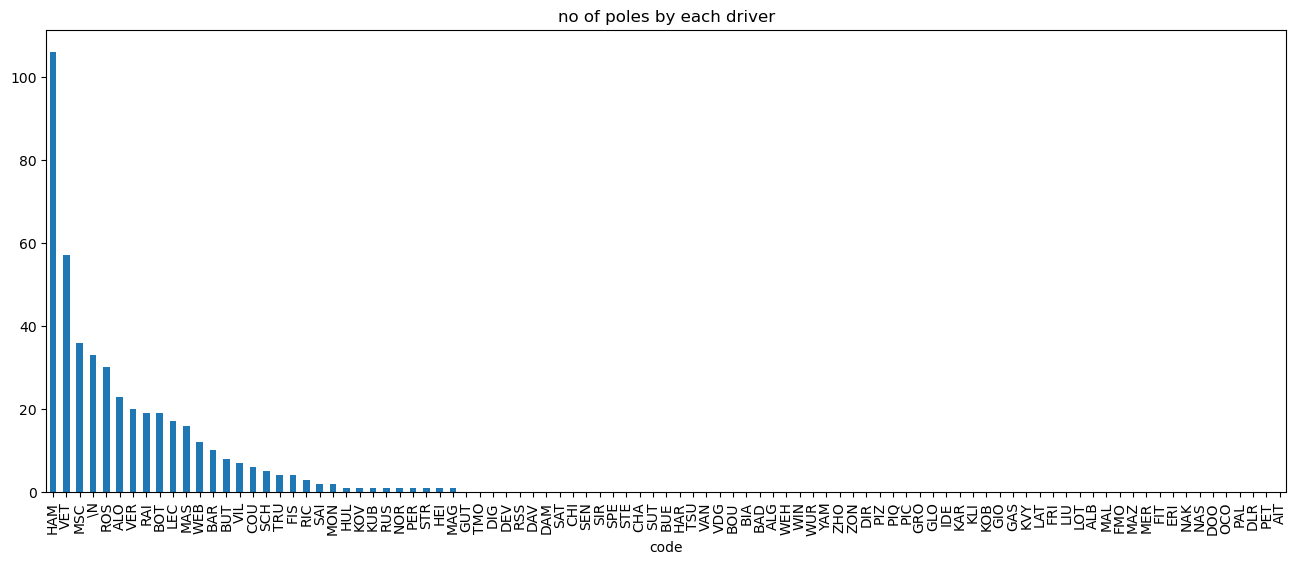

In [22]:
plt.figure(figsize=(16,6))
qualiDriverData.groupby(['code']).apply(lambda x: x[x['position'] == 1 ]['position'].sum()).sort_values(ascending=False).plot(kind='bar',
        x='code',
        y='poles')

plt.title('no of poles by each driver')
 

plt.show()

# **Classifying Teams into 3 categories from data after 2018**

In [23]:
qualiConsData.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,constructorRef,name,nationality,url
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,25,19,5,1,23,3,1:35.227,1:34.759,1:36.613,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,26,19,1,1,22,4,1:35.392,1:34.627,1:36.709,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,47,20,1,1,22,3,1:32.750,1:31.922,1:33.292,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [24]:
qualiConsRaceData = pd.merge(qualiConsData,raceData,on='raceId')

In [25]:
qualiConsRaceData

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,constructorRef,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,mclaren,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,mclaren,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,bmw_sauber,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,bmw_sauber,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,ferrari,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570,9629,1096,842,213,10,17,1:25.859,\N,\N,alphatauri,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N
9571,9620,1096,839,214,31,8,1:25.735,1:25.007,1:24.830,alpine,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N
9572,9623,1096,4,214,14,11,1:25.782,1:25.096,\N,alpine,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N
9573,9621,1096,20,117,5,9,1:25.523,1:24.974,1:24.961,aston_martin,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N


In [26]:
consPodiumData = qualiConsRaceData.groupby(['constructorRef']).apply(lambda x: x[ (x['year'] >= 2018) & ((x['position'] == 1) | (x['position'] == 2) | (x['position'] == 3) ) ]['position'].sum()).sort_values(ascending=False)

In [27]:
consPodiumData= consPodiumData.reset_index()
consPodiumData

,constructorRef,0
0,mercedes,241
1,ferrari,175
2,red_bull,166
3,mclaren,15
4,racing_point,10
5,williams,5
6,force_india,3
7,alpine,2
8,haas,1
9,sauber,0


In [28]:
consPodiumData.shape

(46, 2)

In [29]:
consPodiumData = consPodiumData.set_axis(['constructorRef', 'podiums'], axis=1)
consPodiumData

,constructorRef,podiums
0,mercedes,241
1,ferrari,175
2,red_bull,166
3,mclaren,15
4,racing_point,10
5,williams,5
6,force_india,3
7,alpine,2
8,haas,1
9,sauber,0


In [30]:
def categorize(num):
    if num > 100:
        return "Front Runners"
    elif num>0:
        return "Mid Fielders"
    return "Tail Enders"

In [31]:
consPodiumData["category"]= consPodiumData['podiums'].apply(categorize)
consPodiumData

,constructorRef,podiums,category
0,mercedes,241,Front Runners
1,ferrari,175,Front Runners
2,red_bull,166,Front Runners
3,mclaren,15,Mid Fielders
4,racing_point,10,Mid Fielders
5,williams,5,Mid Fielders
6,force_india,3,Mid Fielders
7,alpine,2,Mid Fielders
8,haas,1,Mid Fielders
9,sauber,0,Tail Enders


(array([38.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

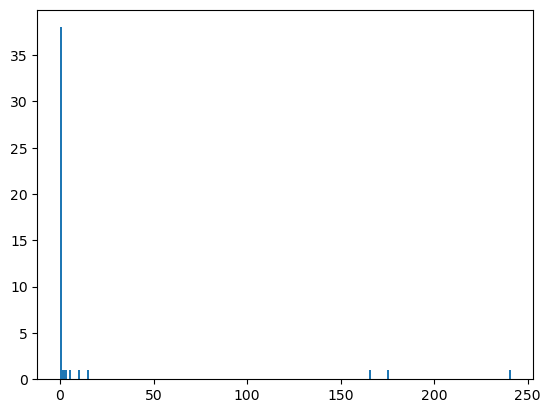

In [32]:
plt.hist(consPodiumData['podiums'], bins=200)

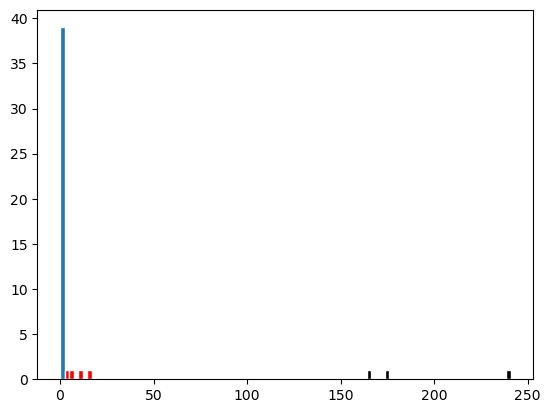

In [33]:
fig, ax = plt.subplots()
data = consPodiumData['podiums']

N, bins, patches = ax.hist(data, edgecolor='white', linewidth=1, bins=100)

for i in range(0):
    patches[i].set_facecolor('b')
for i in range(1,20):    
    patches[i].set_facecolor('r')
for i in range(20, len(patches)):
    patches[i].set_facecolor('black')

plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


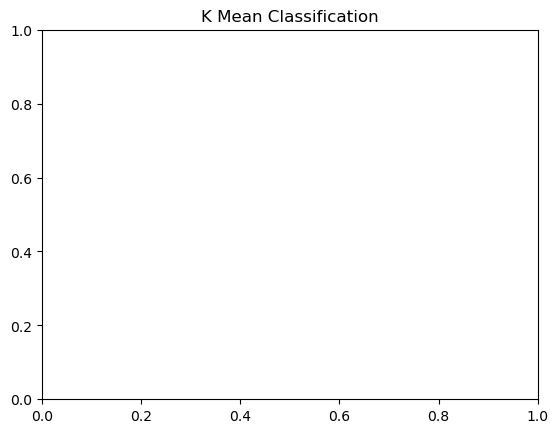

In [34]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

f1 = consPodiumData['podiums'].values
# generate another list
f2 = list(range(0, len(f1)))
X = np.array(list(zip(f1, f2)))
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
#print(centroids)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#050505', s=1000)
plt.title('K Mean Classification')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


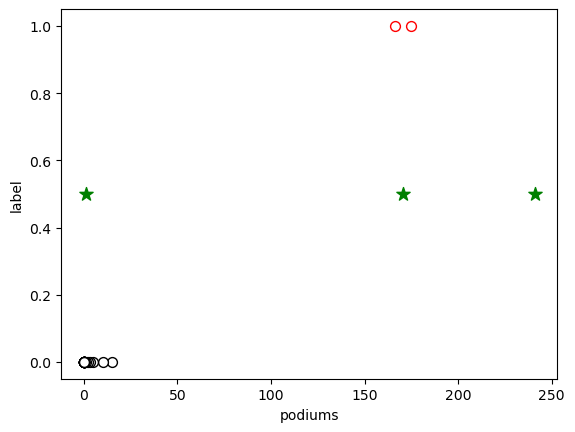

In [35]:
kmeans = KMeans(n_clusters=3)
consPodiumData['label'] = kmeans.fit_predict(consPodiumData[['podiums']])
ax = consPodiumData[consPodiumData['label']==0].plot.scatter(x='podiums', y='label', s=50, color='white', edgecolor='black')
consPodiumData[consPodiumData['label']==1].plot.scatter(x='podiums', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*')